In [2]:
import json 
from collections import Counter
from tqdm import tqdm 
from colorama import Style,Fore
import os
from dotenv import load_dotenv
load_dotenv()

False

In [131]:
from utils1 import openJson,saveJson

## Filtering 1

- videosF1.json contain the videos with fr-FR on the language parameter

In [5]:
videosR3 = openJson("../jsons/videosR3.json")
len(videosR3)

6859

In [7]:
videosF1 = []
for video in videosR3:
    if video['langue']== 'fr-FR':
        videosF1.append(video)
saveJson("../jsons/videosF1.json",videosF1)
len(videosF1)


 json saved


4722

## Filtering 2

### Detecter les videos des Chaines TV 

In [116]:
chainesTv = [
    "France 2", "France 3", "France 4","France 5","Franceinfo",
    "BFMTV", "C8", "CStar", "Gulli", "Cnews",
    "Canal+", "Planète+", "LCI", "Paris première",
    "6ter", "Arte", "M6", "W9",
    "TFX", "TMC", "NRJ12", "TF1","La Chaîne parlementaire",
    "Chérie 25", "RMC"
]
chainesTv = [nomTV.lower().replace(" ", "") for nomTV in chainesTv]

print(len(chainesTv))
print(chainesTv)

25
['france2', 'france3', 'france4', 'france5', 'franceinfo', 'bfmtv', 'c8', 'cstar', 'gulli', 'cnews', 'canal+', 'planète+', 'lci', 'parispremière', '6ter', 'arte', 'm6', 'w9', 'tfx', 'tmc', 'nrj12', 'tf1', 'lachaîneparlementaire', 'chérie25', 'rmc']


In [117]:
videosF1 = openJson("../jsons/videosF1.json")
len(videosF1)

4722

In [118]:
channels = openJson("../../collecting/jsons/channels.json")
def getChannelName(channelId):
    for channel in channels:
        if channel['id_chaine']==channelId:
            return channel['nom_chaine'].lower().replace(" ", "")

In [126]:
chainesTVCounter = Counter()
videosChainesTV = []
for video in videosF1:
    channelName = getChannelName(video['id_chaine'])
    for name in chainesTv:
        if name in channelName:  
            print(name,' ',channelName,' ',video['id_video'])
            chainesTVCounter[name]+=1
            videosChainesTV.append(video['id_video'])

france3   france3grandest   dLUQ0xpq8g4
france3   france3normandie   y16Qgap0wW8
france3   france3nouvelle-aquitaine   TFeG6-UKO9U
tf1   tf1info   ojIs2lHKYdA
france3   france3normandie   HXbStCizF74
france3   france3bourgogne-franche-comté   A1jj7uXSxs4
france3   france3occitanie   IRFs_Ixy9ZM
france3   france3hauts-de-france   hoFV4QDkWa8
france3   france3toutesrégions   iC-3Wo43Bro
france3   france3nouvelle-aquitaine   tGj_1evPWN0
arte   arte   r9wRwvEHFsA
france3   france3occitanie   yjjRv-nEdHE
france3   france3grandest   HflJXjrYBCE
france3   france3corseviastella   b7nV4URjwDk
arte   arte   q_nt-DDvq4o
france3   france3occitanie   oxjQ2xSDRU8
france2   france24   jsFCmSWQmUs
france2   france24   fRyK_Fky8q4
tf1   tf1info   g11uU0ezC7s
france3   france3provence-alpes-côted'azur   ul0lmV0rQvM
arte   météoàlacarte-francetélévisions   96N7p51oO4c
france2   france24   rX8xnkiAAOA
france3   france3nouvelle-aquitaine   MnZwX830SMQ
france3   france3bourgogne-franche-comté   yMD5K1sibMo


In [121]:
chainesTVCounter

Counter({'france3': 146,
         'arte': 37,
         'france2': 10,
         'bfmtv': 8,
         'tf1': 7,
         'cnews': 5,
         'lci': 3,
         'rmc': 1,
         'canal+': 1})

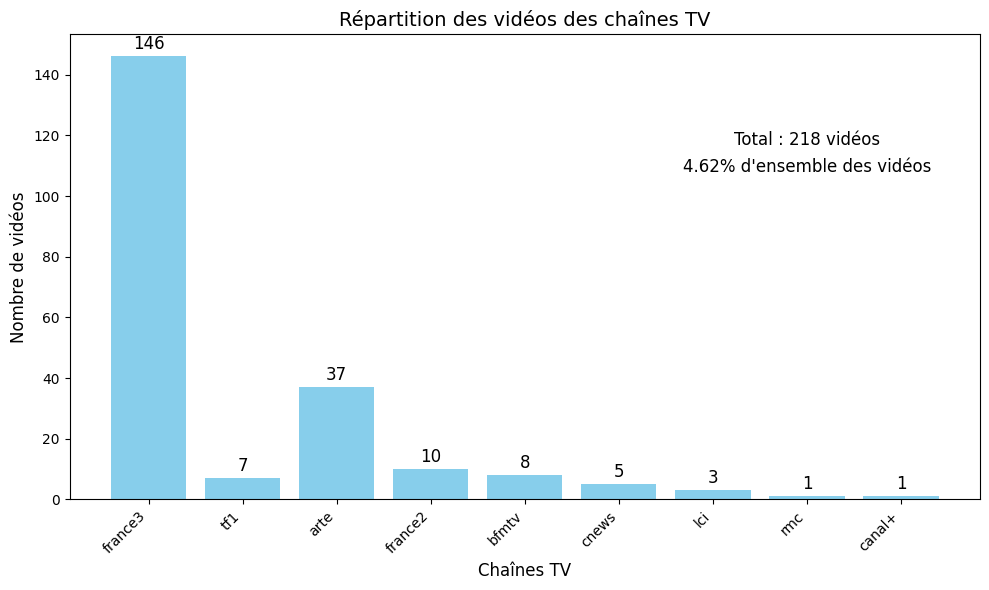

In [124]:
import matplotlib.pyplot as plt

labels = list(chainesTVCounter.keys())
sizes = list(chainesTVCounter.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='skyblue')

plt.title("Répartition des vidéos des chaînes TV", fontsize=14)
plt.xlabel("Chaînes TV", fontsize=12)
plt.ylabel("Nombre de vidéos", fontsize=12)
plt.xticks(rotation=45, ha='right')

total_videos_tv = sum(sizes)
plt.text(len(labels) - 2, max(sizes) * 0.8, f"Total : {total_videos_tv} vidéos", fontsize=12, ha='center')
plt.text(len(labels) - 2, max(sizes) * 0.74, "4.62% d'ensemble des vidéos", fontsize=12, ha='center')

# Ajouter les nombres au-dessus des barres et les rendre en gras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [123]:
(218/len(videosF1))*100

4.616687844133842

### Creer videosF2.json

In [135]:
videosChainesTV

['dLUQ0xpq8g4',
 'y16Qgap0wW8',
 'TFeG6-UKO9U',
 'ojIs2lHKYdA',
 'HXbStCizF74',
 'A1jj7uXSxs4',
 'IRFs_Ixy9ZM',
 'hoFV4QDkWa8',
 'iC-3Wo43Bro',
 'tGj_1evPWN0',
 'r9wRwvEHFsA',
 'yjjRv-nEdHE',
 'HflJXjrYBCE',
 'b7nV4URjwDk',
 'q_nt-DDvq4o',
 'oxjQ2xSDRU8',
 'jsFCmSWQmUs',
 'fRyK_Fky8q4',
 'g11uU0ezC7s',
 'ul0lmV0rQvM',
 '96N7p51oO4c',
 'rX8xnkiAAOA',
 'MnZwX830SMQ',
 'yMD5K1sibMo',
 '6w3hqPHPogA',
 'zZ0btQ-aZv8',
 'NYCCwOdqPDA',
 'WevIdMyvFUk',
 'epHgTx5XZTU',
 'lokfk0lj9Rk',
 'U5CQvKiLoCo',
 'uVmlqnrKKoA',
 'NRZa1ciorPg',
 'LsCnUBSPg6M',
 'jtfRpgVpuKU',
 'iiZFEGe0BmI',
 'Jjg9Pz_mZ1w',
 'boNqBNbVT7I',
 'q2Th8GIx2zI',
 'mePq4SsM1dw',
 'j0vCFOUMhSk',
 'IDSnX_flvs8',
 'n6oZoAGd-Hg',
 'JuN34OyMKEo',
 'bVQRUPP_FR8',
 'OzgkisPNHz8',
 'B43uPl2LP2U',
 'HfNYyNNlBfc',
 'DIDiDXLBdXM',
 '-TttfNfM55o',
 'jBCVqs3ubkY',
 'OhQccUoW9j4',
 'KGbeiCal8hI',
 'kggG5ewMsko',
 'y3VnajeE0DY',
 'Fd89ir0heWQ',
 'nG7ZrFRv_H4',
 'XCIHepMpkVk',
 'fqimFtLhDQk',
 'Bw1N_z3sLXk',
 'JyTBmA2eaEU',
 '_Qh2R-G5IFI',
 'Y7EjXc

In [128]:
len(videosChainesTV)

218

In [133]:
videosF2 = []
for video in videosF1:
    if video['id_video'] not in videosChainesTV:
        videosF2.append(video)
saveJson("../jsons/videosF2.json",videosF2)


 json saved


verification

In [134]:
len(videosF1)-len(videosF2)

218

In [136]:
len(videosF1)

4722

## Filtering 3